In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np              # working with number arrays etc.
from netCDF4 import Dataset     # reading netcdf files
from numpy import trapz         # for integration

# all file paths: change according to file location
path_les="/Users/amrapallig/run/cvmix_analysis/les/"
path_adc="/Users/amrapallig/Desktop/cvmix/adc/convection/"
path_kpp="/Users/amrapallig/run/cvmix_analysis/les/KPP-CVMix/"
path_ke="/Users/amrapallig/run/cvmix_analysis/les/K-EPSILON-SG/"

In [2]:

# density calculation from given temp and salinity
def density_eos(t,s):
    density= 1026.0*(1.0-2e-4*(t-20)+8e-4*(s-35))
    return density

#rate of change of depth integrated potential energy calculation
def pot_energy2(temperature_0,temperature_t,salinity_0,salinity_t,depth,dtdz,dsdz,t=95):
    ind=np.where((depth)>-75)  ##plots are weird with, 5 m doing worse than 10m if whole depth 100m is selected
                                ## thats why I am taking depth till -75
    depth=depth[ind]
    #for initial time
    
    # defined initial profiles as data saved for les and adc are from 1 hr and 
    # for kpp and kepsilon are from zero hr
    #temp=20+dtdz*depth
    #salt=35+dsdz*depth 
    #temp=temperature_0
   # salt=salinity_0
    temp=temperature_0[ind]
    salt=salinity_0[ind]
    density= density_eos(temp,salt)
    # depth integrated potential energy PE=density*9.81*depth
    area=trapz(density*9.81*depth,depth)
    PE_0=area
    #print(PE_0)
    
    #for final time
    #temp=temperature_t
    #salt=salinity_t
    temp=temperature_t[ind]
    salt=salinity_t[ind]
    density= density_eos(temp,salt)
    plt.plot(density,depth)
    # depth integrated potential energy PE=density*9.81*depth
    # area under PE
    area=trapz(density*9.81*depth,depth)
    PE_t=area
    PE_rate_change=(PE_t-PE_0)/(3600*t)  # in Watt/m^2
    #print(PE_t)
    return (PE_rate_change)


In [ ]:
file_names = [*[f"Cooling{x}" for x in [1]], 
            #  *[f"Evap{x}" for x in [1, 4]],
            #  *[f"Strat{x}" for x in [1, 10, 20]],
            #  *[f"T1S{x}" for x in [0, 1, 3, 15]],
             ]
#datasets = [1, 10]

In [ ]:
t=380 #95 hr
#t=360 #90 hr
t1=t-1 #83 hr # 12 hr avg

#kpp
path_kpp="/Users/amrapallig/run/cvmix_analysis/les/KPP-CVMix/"

results_kpp = {}



for fn in file_names:
    mf1m = Dataset(path_kpp+f'VR1m/{fn}/gotm_out.nc', mode='r')
    mf10m = Dataset(path_kpp+f'VR10m/{fn}/gotm_out.nc', mode='r')
    if "Cooling" in fn:
        fn = fn.replace("Cooling", "c")
        dtdz=0.1; dsdz=0.0
    if "Evap" in fn:
        fn = fn.replace("Evap", "e")
        dtdz=0.0; dsdz=-0.025
    if "Strat" in fn:
        fn = fn.replace("Strat", "s")
        if "10" in fn:
            dtdz=0.1; dsdz=0.0
        elif "1" in fn:
            dtdz=0.01; dsdz=0.0
        elif "20" in fn:
            dtdz=0.2; dsdz=0.0
        else: 
            print("error",fn)
    if "T1S" in fn:
        fn = fn.replace("T1S", "t1s")
        dtdz=0.05; dsdz=-0.025


    # compute pot
    results_kpp[f"pe_{fn}_1m_kpp"] = pot_energy2(np.flip(mf1m.variables["temp"][0,:,0,0]),
                                             np.flip(np.nanmean(mf1m.variables["temp"][t1:t,:,0,0],axis=0)),
                                             np.flip(mf1m.variables["salt"][0,:,0,0]),
                                             np.flip(np.nanmean(mf1m.variables["salt"][t1:t,:,0,0],axis=0)),
                                             np.flip( mf1m.variables['z'][0,:,0,0]),
                                             dtdz,
                                             dsdz)
    results_kpp[f"pe_{fn}_10m_kpp"] = pot_energy2(np.flip(mf10m.variables["temp"][0,:,0,0]),
                                             np.flip(np.nanmean(mf10m.variables["temp"][t1:t,:,0,0],axis=0)),
                                             np.flip(mf10m.variables["salt"][0,:,0,0]),
                                             np.flip(np.nanmean(mf10m.variables["salt"][t1:t,:,0,0],axis=0)),
                                             np.flip(mf10m.variables['z'][0,:,0,0]),
                                             dtdz,
                                             dsdz)
#results_kpp

In [ ]:
t=int(380/2) #95 hr
t=380
#t=360 #90 hr
t1=t-1 #83 hr #12 hr average

#ke


results_ke = {}
file_names = [*[f"Cooling{x}" for x in [2]], 
          #    *[f"Evap{x}" for x in [1, 4]],
         #     *[f"Strat{x}" for x in [1, 10, 20]],
         #     *[f"T1S{x}" for x in [0, 1, 3, 15]],
             ]
#datasets = [1, 10]


for fn in file_names:
    mf1m = Dataset(path_ke+f'VR1m/{fn}/gotm_out.nc', mode='r')
    mf10m = Dataset(path_ke+f'VR10m/{fn}/gotm_out.nc', mode='r')
    if "Cooling" in fn:
        fn = fn.replace("Cooling", "c")
        dtdz=0.1; dsdz=0.0
    if "Evap" in fn:
        fn = fn.replace("Evap", "e")
        dtdz=0.0; dsdz=-0.025
    if "Strat" in fn:
        fn = fn.replace("Strat", "s")
        if "10" in fn:
            dtdz=0.1; dsdz=0.0
        elif "1" in fn:
            dtdz=0.01; dsdz=0.0
        elif "20" in fn:
            dtdz=0.2; dsdz=0.0
        else: 
            print("error",fn)
    if "T1S" in fn:
        fn = fn.replace("T1S", "t1s")
        dtdz=0.05; dsdz=-0.025


    # compute pot
    results_ke[f"pe_{fn}_1m_ke"] = pot_energy2(np.flip(mf1m.variables["temp"][0,:,0,0]),
                                            np.flip(np.nanmean(mf1m.variables["temp"][t1:t,:,0,0],axis=0)),
                                              np.flip(mf1m.variables["salt"][0,:,0,0]),
                                              np.flip(np.nanmean(mf1m.variables["salt"][t1:t,:,0,0],axis=0)),
                                              np.flip(mf1m.variables['z'][0,:,0,0]),
                                              dtdz,
                                              dsdz)
    results_ke[f"pe_{fn}_10m_ke"] = pot_energy2(np.flip(mf10m.variables["temp"][0,:,0,0]),
                                             np.flip(np.nanmean(mf10m.variables["temp"][t1:t,:,0,0],axis=0)),
                                             np.flip(mf10m.variables["salt"][0,:,0,0]),
                                             np.flip(np.nanmean(mf10m.variables["salt"][t1:t,:,0,0],axis=0)),
                                             np.flip(mf10m.variables['z'][0,:,0,0]),
                                             dtdz,
                                             dsdz)
#results_ke




Text(0.5, 1.0, 'kpp_cooling16')

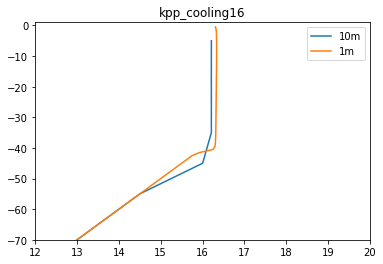

In [11]:
t=380
#t=360 #90 hr
t1=360 #83 hr #12 hr average


path_kpp="/Users/amrapallig/run/cvmix_analysis/les/KPP-CVMix/"

mf10m = Dataset(path_kpp+'VR10m/Cooling16/gotm_out.nc', mode='r')
plt.plot(np.nanmean(mf10m.variables["temp"][t1:t,:,0,0],axis=0),(mf10m.variables['z'][0,:,0,0]))
mf1m = Dataset(path_kpp+'VR1m/Cooling16/gotm_out.nc', mode='r')
plt.plot(np.nanmean(mf1m.variables["temp"][t1:t,:,0,0],axis=0),(mf1m.variables['z'][0,:,0,0]))
plt.legend(['10m','1m'])
plt.ylim(-70,1)
plt.xlim(12,20)
plt.title("kpp_cooling16")

Text(0.5, 1.0, 'ke_cooling4')

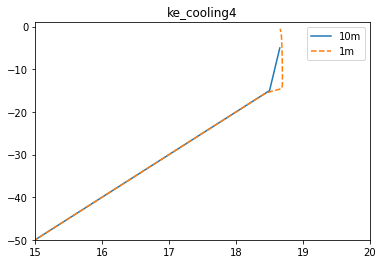

In [18]:
path_ke="/Users/amrapallig/run/cvmix_analysis/les/K-EPSILON-SG/"
t=int(380/2)
#t=360 #90 hr
t1=t-3 #83 hr #12 hr average



mf10m = Dataset(path_ke+'VR10m/Cooling4/gotm_out.nc', mode='r')
plt.plot(np.nanmean(mf10m.variables["temp"][t1:t,:,0,0],axis=0),(mf10m.variables['z'][0,:,0,0]))
mf1m = Dataset(path_ke+'VR1m/Cooling4/gotm_out.nc', mode='r')
plt.plot(np.nanmean(mf1m.variables["temp"][t1:t,:,0,0],axis=0),(mf1m.variables['z'][0,:,0,0]),'--')
plt.legend(['10m','1m'])
plt.ylim(-50,1)
plt.xlim(15,20)
plt.title("ke_cooling4")

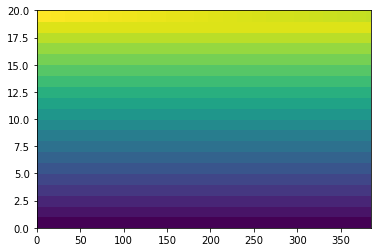

In [35]:
plt.pcolor(np.transpose(mf10m.variables["temp"][:,-20:,0,0]))